# Power Up Research Software Development with Github Copilot


### 1.0 Data loading

#### 1.1 Load the dataset

In [fm-ad-notebook-exploration.ipynb](fm-ad-notebook-exploration.ipynb), we conducted various data exploration techniques to gain a deeper understanding of the dataset. Now equipped to make informed decisions regarding data cleaning. Let's load the CSV file generated from the [fm-ad-notebook-exploration.ipynb](fm-ad-notebook-exploration.ipynb) and reference it as a dataframe so that we can start working with the dataset.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# convert the combined_data.csv to dataframe called df
df = pd.read_csv('combined_data.csv')

#### 1.2 Set output display

To effectively view and analyze the dataset, we need to configure pandas to display all columns and most rows of the dataframe.

In [3]:
pd.set_option("display.max_columns", None)  # or 1000
pd.set_option("display.max_rows", None)  # or 1000

### 3.0 Data processing

#### 3.1 Dropping columns

According to the dataset documentation, there are 18,004 records in the study. Additionally, results from section 2.6 of [fm-ad-notebook-exploration.ipynb](fm-ad-notebook-exploration.ipynb) indicate that the `case_id` column has 18,004 unique values.

Moreover, other columns also have 18,004 unique values. These columns likely serve as unique identifiers similar to the `case_id` column. For the purposes of this workshop, we can assume they are redundant.

Let's create a prompt to identify which of these columns fit this criterion.

In [4]:
# create a dictionary to store names of columns that have great than or equal to 18004 unique values
columns = {}
for col in df.columns:
    if df[col].nunique() >= 18004:
        columns[col] = df[col].nunique()

As we can see from the list above, the `case_id` column is included in the list. However, since we want to use this list to specifiy which columns to remove from the dataframe, we should remove `case_id` from this list.

In [5]:
# remove case_id from the dictionary above
columns.pop('case_id', None)

18004

Let's verify that the `case_id` column has been removed.

In [6]:
# show the dictionary
columns


{'cases.submitter_id': 18004,
 'demographic.submitter_id': 18004,
 'demographic_id': 18004,
 'diagnoses.submitter_id': 18004,
 'diagnosis_id': 18004,
 'samples.submitter_id': 18004,
 'sample_id': 18004,
 'aliquots.submitter_id': 18004,
 'aliquot_id': 18004,
 'read_groups.submitter_id': 18004,
 'read_group_id': 18004,
 'read_groups.library_name': 18004,
 'read_groups.name': 18004,
 'read_groups.experiment_name': 18004}

In [7]:
# show if case_id is in the columns
'case_id' in columns

False

In [8]:
# drop columns from the dictionary above
df.drop(columns=columns, inplace=True)

In [9]:
# show the shape of the new dataframe
df.shape

(72016, 24)

In [10]:
# show the columns in the dataframe
df.columns

Index(['case_id', 'project_id', 'project.name', 'cases.disease_type',
       'cases.primary_site', 'demographic.gender',
       'diagnoses.primary_diagnosis', 'diagnoses.site_of_resection_or_biopsy',
       'diagnoses.classification_of_tumor',
       'diagnoses.tissue_or_organ_of_origin', 'diagnoses.age_at_diagnosis',
       'diagnoses.morphology', 'samples.sample_type',
       'samples.tumor_descriptor', 'aliquots.analyte_type',
       'slides.submitter_id', 'slide_id', 'slides.percent_tumor_nuclei',
       'read_groups.is_paired_end', 'read_groups.library_selection',
       'read_groups.library_strategy', 'read_groups.platform',
       'read_groups.sequencing_center', 'read_groups.read_length'],
      dtype='object')

#### 3.2 Normalizing missing values

Before we handle duplicate records, let's normalize the notation for missing values first. Currently, missing values are listed as 'Unkown' or NaN. Let's convert them all to NaN for uniformity.

In [11]:
# change values 'Unknown' to NaN in the dataframe using numpy
df.replace('Unknown', np.nan, inplace=True)

We should verify if the operation above was done successfully.

In [12]:
# check if any columns still have the value 'Unknown'
for col in df.columns:
    if 'Unknown' in df[col].values:
        print(col)

#### 3.4 Handling duplicate records

We saw in section 2.7 of [fm-ad-notebook-exploration.ipynb](fm-ad-notebook-exploration.ipynb) notebook that there were duplicate records. Let's go ahead and drop them.

In [13]:
# drop duplicate records in the dataframe
df.drop_duplicates(inplace=True)

Let's take a look at the dimensions of the new dataframe. If the duplicates were dropped succesfully, there should be half the amount of records in the new dataframe.

In [14]:
# show dataframe shape
df.shape

(36008, 24)

In section 2.7, you saw that there were records that shared the same `case_id`. Let's check if there are any other records share a `case_id`.


In [15]:
# count how many records share the same case_id
df['case_id'].value_counts()

case_id
b9e3dc0d-a4e1-45e2-8532-6af921d41f55    2
287711a6-037d-47e9-bce0-0fc6bdeac390    2
07842dff-fb95-47af-87ed-9729854daf91    2
521c3610-2554-4ff3-9186-cc7b90593222    2
070bb6e8-21c8-4d36-a7c9-cae16d3846dd    2
7e808cd1-4de8-417a-b67f-9d9c336719fb    2
e6b7c59c-38a2-497a-ac1e-51027faa77ff    2
2828f2ca-c7c6-49c4-8a99-8d2a8f31ec14    2
3c79f01d-67bb-4bc8-931e-c31200637632    2
446c7d05-2882-4fdd-bba4-37689449bc50    2
e582642e-5213-4a97-80bd-5acf8e413267    2
b4d14525-221b-4c04-90b7-215aef92bcda    2
8d13f8e6-e02e-449d-b816-cf2033615a0d    2
5cd5a8fb-266f-4083-a145-c164168c3500    2
199ccc45-2421-4c01-bbd1-c19c072a79ca    2
ab5b3b4d-1775-441b-af3f-fd26ced56fdd    2
9cbaa6e3-8cd0-4c2e-a76c-f73db52df5dc    2
9a44fb26-1f6b-4abd-96cf-21b5d1b376c9    2
343ef207-bbf9-4a33-8ceb-9d6fa8a66929    2
8ed91a25-33ce-4645-89ca-824a3066559a    2
d3d9a0ec-c3dd-4abb-b7c5-478501085041    2
bf247220-f269-4883-be80-09b27afaaabc    2
70f43c61-cd02-48dd-b137-1d0b19f7cc93    2
560c29f7-70df-444e-838c-8c

Let's take a look at a visual representation of the distribution of the number of records that are shared by `case_id`'s.

<Axes: xlabel='count'>

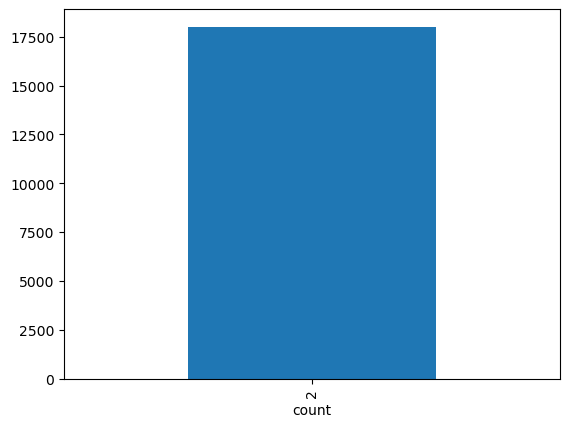

In [16]:
# show a bar graph with the x axis as the number of records shared by case_id and the y axis as the number of records
df['case_id'].value_counts().value_counts().plot(kind='bar')

Let's take a look at the list of records shared by a particular `case_id`.

Create a prompt below to generate code to show you records that shares a case_id different from the case_id in section 2.7 of [fm-ad-notebook-exploration.ipynb](fm-ad-notebook-exploration.ipynb).

In [17]:
# show the records with the case_id fcd9637f-00f2-49e9-bb87-94e556d5d7eb
df[df['case_id'] == 'fcd9637f-00f2-49e9-bb87-94e556d5d7eb']

,case_id,project_id,project.name,cases.disease_type,cases.primary_site,demographic.gender,diagnoses.primary_diagnosis,diagnoses.site_of_resection_or_biopsy,diagnoses.classification_of_tumor,diagnoses.tissue_or_organ_of_origin,diagnoses.age_at_diagnosis,diagnoses.morphology,samples.sample_type,samples.tumor_descriptor,aliquots.analyte_type,slides.submitter_id,slide_id,slides.percent_tumor_nuclei,read_groups.is_paired_end,read_groups.library_selection,read_groups.library_strategy,read_groups.platform,read_groups.sequencing_center,read_groups.read_length
455,fcd9637f-00f2-49e9-bb87-94e556d5d7eb,FM-AD,Foundation Medicine Adult Cancer Clinical Data...,Gliomas,"Spinal Cord, Cranial Nerves, And Other Parts O...",male,"Glioblastoma, NOS",Not Reported,NaN,"Nervous system, NOS",19494.0,9440/3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4301,fcd9637f-00f2-49e9-bb87-94e556d5d7eb,FM-AD,Foundation Medicine Adult Cancer Clinical Data...,Gliomas,"Spinal Cord, Cranial Nerves, And Other Parts O...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tumor,NaN,DNA,AD1515_slide,7f4c824b-8e78-41d9-a6b4-aafedbd5a242,90.0,True,Targeted Sequencing,Targeted Sequencing,Illumina,Foundation Medicine,49.0


So far we have created prompts that are called zero-shot prompts. Basically it means that these prompts have no specific examples, we just tell it to do what we want.

Next we will be working with one-shot prompts. In addition to describing what you want like in zero-shot prompts, one-shot prompts are prompts adds the prompt with a single example. This helps generate a more context-aware response.

In [18]:
# Select the two records with the same 'case_id' value of 'fcd9637f-00f2-49e9-bb87-94e556d5d7eb.
# Display these records for visual inspection. Then, verify that these records complement each other in terms of null and non-null values for all columns after the first five columns.
# In other words, if one record has NaN values in a column, the other record should have non-NaN values in that same column, and vice versa.
# Also, if both records have NaN values in the same column and ignore it from the comparison
# If the two records complement each other, print "The two records complement each other." Otherwise, print "The two records do not complement each other."

# get the records with the case_id fcd9637f-00f2-49e9-bb87-94e556d5d7eb
case_id_records = df[df['case_id'] == 'fcd9637f-00f2-49e9-bb87-94e556d5d7eb']

# get the first record
record1 = case_id_records.iloc[0]

# get the second record
record2 = case_id_records.iloc[1]

# compare the two records
complement = True
for column in record1.index[5:]:
    if record1[column] != record2[column]:
        if pd.isnull(record1[column]) or pd.isnull(record2[column]):
            continue
        else:
            complement = False
            break

if complement:
    print("The two records complement each other.")
else:
    print("The two records do not complement each other.")

The two records complement each other.


Based on the output above, it looks like these records compliment each other. We need to verify that all records with the same `case_id` perfectly complement each other in terms of null and non-null values. If one record has NaN values in a column, the other records should have non-NaN values in that same column, and vice versa. This step ensures data completeness.

In [19]:
# write a Python code snippet that iterates over all unique 'case_id' values. For each 'case_id', select all records associated with that 'case_id'.
# Verify that these records complement each other in terms of null and non-null values for all columns AFTER the first five columns.
# In other words, if one record has NaN values in a column, the other records should have non-NaN values in that same column, and vice versa.
# Print a dictionary where each 'case_id' is a key and the corresponding value is a boolean indicating whether all records with that 'case_id' perfectly complement each other in terms of null and non-null values.
# For example, if all records with 'case_id' = 'fcd9637f-00f2-49e9-bb87-94e556d5d7eb' perfectly complement each other, the dictionary should have the key 'fcd9637f-00f2-49e9-bb87-94e556d5d7eb' with a value of True.

# create a dictionary to store the case_id and the boolean value
case_id_dict = {}

# iterate over all unique case_id values
for case_id in df['case_id'].unique():
    # get the records with the case_id
    case_id_records = df[df['case_id'] == case_id]
    complement = True
    for i in range(len(case_id_records)):
        record1 = case_id_records.iloc[i]
        for j in range(i+1, len(case_id_records)):
            record2 = case_id_records.iloc[j]
            for column in record1.index[5:]:
                if record1[column] != record2[column]:
                    if pd.isnull(record1[column]) or pd.isnull(record2[column]):
                        continue
                    else:
                        complement = False
                        break
            if not complement:
                break
        if not complement:
            break
    case_id_dict[case_id] = complement

case_id_dict

{'b9e3dc0d-a4e1-45e2-8532-6af921d41f55': True,
 '3d9bdc0d-7920-4fe3-a958-7f85e5c27e59': True,
 '95ba7ce2-2430-4273-8b65-f1317f3e2293': True,
 'af37748c-4d6f-4d13-ac28-bfe5aee28d0b': True,
 'e88574d3-5c84-4419-b6cc-32d6adec31a2': True,
 'b6b5a48d-b023-42d1-9f2e-16ac2c1ff0b1': True,
 '99ba82b7-3c25-44e0-8325-0266e19a69e7': True,
 '71c57301-afd2-44ec-a6de-c5ea59778530': True,
 'dfccfaf2-64c9-4129-9b9c-839da6496c9a': True,
 'bb894201-a8ec-47c5-a261-9f830e1468f8': True,
 '0e640055-e0e0-4c34-9d4b-9ae98637e8e4': True,
 'eb38b2d4-633c-49e5-a372-f028420f753b': True,
 'f507862b-d551-4062-9f73-1de7fc0aa99d': True,
 '76d2d08e-d0ed-4ec7-a7f0-8e2e885ed8e0': True,
 '9de7ed15-df6c-40a3-80ff-776fcb084bf6': True,
 '7781cb27-09fd-4f17-a232-d1a4a45db886': True,
 '42dfcb95-9bda-475b-884e-2483d2bce492': True,
 '8fecdca2-f816-46a4-a731-9821bd7c2f81': True,
 '4d27c45b-e766-40f2-bcec-3c1f173680dc': True,
 '9f199d07-bbc5-4368-9538-f727948163fa': True,
 '8ed9e86d-79bc-4e9a-b5fc-e84068ad8150': True,
 '15e59d67-94

In [20]:
# Check if all the values in the dictionary are True if so print "All records complement each other." otherwise print "Not all records complement each other."
if all(case_id_dict.values()):
    print("All records complement each other.")
else:
    print("Not all records complement each other.")

All records complement each other.


Combine records with the same `case_id` by taking the first non-null value for each group. This step consolidates the data into a more concise format.

In [21]:
# Combine records with the same 'case_id' and take the first non-null value for each group
df = df.groupby('case_id').first().reset_index()

Let's take a look at the shape and the first few records of our dataframe to ensure the data consolidation was successful. A success should show that the dataframe has 18,004 records.

In [22]:
# show the shape of the dataframe
df.shape

(18004, 24)

Ensure there are no duplicate records in the new dataframe.

In [23]:
# show the number of duplicate records in the dataframe
df.duplicated().sum()

0

Review the number of unique values in each column to identify any potential issues.

In [24]:
# show number of unique values in each column in descending order
df.nunique().sort_values(ascending=False)

case_id                                  18004
slide_id                                 17903
slides.submitter_id                      17903
diagnoses.age_at_diagnosis               11266
diagnoses.primary_diagnosis                 73
diagnoses.morphology                        70
diagnoses.site_of_resection_or_biopsy       68
diagnoses.tissue_or_organ_of_origin         46
cases.primary_site                          41
slides.percent_tumor_nuclei                 30
cases.disease_type                          23
samples.sample_type                          3
demographic.gender                           3
samples.tumor_descriptor                     2
diagnoses.classification_of_tumor            2
project_id                                   1
aliquots.analyte_type                        1
project.name                                 1
read_groups.is_paired_end                    1
read_groups.library_selection                1
read_groups.library_strategy                 1
read_groups.p

Check if there are still any empty values in the dataframe.

In [25]:
# check to see if there are any null values in the dataframe
df.isnull().sum().sum()

8355

Show the number of unique values in the columns that have null values to understand the extent of missing data.

In [26]:
# show the number unique values of the columns that have null values
df.isnull().sum()[df.isnull().sum() > 0]

cases.primary_site                     1562
diagnoses.classification_of_tumor      2464
diagnoses.tissue_or_organ_of_origin    1562
samples.tumor_descriptor               2464
slides.submitter_id                     101
slide_id                                101
slides.percent_tumor_nuclei             101
dtype: int64

##### 3.3 Normalizing age column

Let's start by normalizing the diagnoses.age_at_diagnosis column which represents age of participants. As you will see, the diagnoses.age_at_diagnosis column does not represent age in years.

In [27]:
# describe stats on diagnoses.age_at_diagnosis column
df['diagnoses.age_at_diagnosis'].describe()

count    18004.000000
mean     21251.017774
std       4729.685429
min       6947.000000
25%      18299.000000
50%      21588.500000
75%      24600.000000
max      32493.000000
Name: diagnoses.age_at_diagnosis, dtype: float64

According to the publication associated with this dataset, the youngest age of the participant is 19. Let's do some basic math to calulate our normalization factor.

In [28]:
6947/19

365.63157894736844

Based on the calculation above, the column's normalization factor is 365. So let's transform the existing age column by dividing it by 365 and create a new column and dataframe.

In [29]:
# create a new column 'diagnoses.age_at_diagnosis_years' by dividing 'diagnoses.age_at_diagnosis' by 365, and drop the 'diagonses.age_at_diagnosis' column
df['diagnoses.age_at_diagnosis_years'] = df['diagnoses.age_at_diagnosis'] / 365

The publication “High-Throughput Genomic Profiling of Adult Solid Tumors Reveals Novel Insights into Cancer Pathogenesis”, http://cancerres.aacrjournals.org/content/77/9/2464.long, removes records of patients aged 89 or older. Let's do some data cleaning to reflect this.

In [30]:
# count how many records that have the value of 'diagnosis.age_at_diagnosis_years' greater or equal to 89
(df['diagnoses.age_at_diagnosis_years'] >= 89).sum()

1

In [31]:
# drop the record with 'diagnosis.age_at_diagnosis_years' greater or equal to 89
df = df[df['diagnoses.age_at_diagnosis_years'] < 89]

Currently, the age column stores the ages of the participants as floats. The publication however describes and visualizes the result of the age distribution as integers. Given that information, let's do more data transformation to reflect this.

In [32]:
# round down the diagnoses.age_at_diagnosis_years column and convert to integer
df['diagnoses.age_at_diagnosis_years'] = df['diagnoses.age_at_diagnosis_years'].apply(np.floor).astype(int)

Verify the range of the new age column is as expected. The proper range should be between 19-88.

In [33]:
# show statistical summary of the diagnoses.age_at_diagnosis_years column
df['diagnoses.age_at_diagnosis_years'].describe()

count    18003.000000
mean        57.723546
std         12.957630
min         19.000000
25%         50.000000
50%         59.000000
75%         67.000000
max         88.000000
Name: diagnoses.age_at_diagnosis_years, dtype: float64

Once the range is expected, we can drop the diagnosis.age_at_diagnosis column so that in the next notebook, GitHub Copilot is able to automatically choose our single "age column" for vidsualizations.

In [34]:
# drop diagnosis.age_at_diagnosis column
df.drop(columns=['diagnoses.age_at_diagnosis'], inplace=True)

#### 3.5 Save cleaned dataframe

Save the cleaned dataframe to a new CSV file named combined_data_cleaned.csv.

In [35]:
# Save dataframe to a new csv file named combined_data_cleaned.csv
df.to_csv('combined_data_cleaned.csv', index=False)